In [123]:
# imports

from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_palette('husl')
sns.set(style = "darkgrid")
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image, ImageFilter
import requests
from io import BytesIO
import random
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, BatchNormalization, MaxPool2D, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras import layers
from tensorflow.keras.applications import imagenet_utils
import tensorflow as tf
from sklearn.metrics import confusion_matrix

In [105]:
train = pd.read_csv("sign_mnist_train.csv")


test = pd.read_csv("sign_mnist_test.csv")

In [106]:
train.shape

(27455, 785)

In [107]:
train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [108]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [109]:
# data as numpy arry
train_data = np.array(train, dtype = "float32")
test_data = np.array(test, dtype = "float32")

label for image is:  L


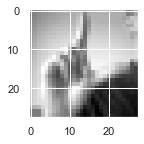

In [110]:
# Store labels of dataset
labels = ["A", "B", "C", "D","E", "F", "G", "H", "I","J","K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y"]
# Print random training images, along with the labels

i = random.randint(1, train.shape[0])
fig, ax1 = plt.subplots(figsize=(2,2))
plt.imshow(train_data[i,1:].reshape((28,28)), cmap= "gray")
print("label for image is: ", labels[int(train_data[i,0])])

In [111]:
random.randint(1, train.shape[0])

4811

Text(0.5, 1.0, 'label')

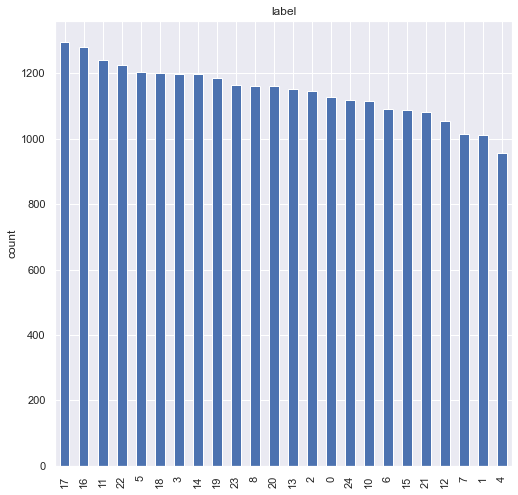

In [112]:
# data distrubtion visualisation

fig = plt.figure(figsize=(18,18))
ax1 = fig.add_subplot(221)
train["label"].value_counts().plot(kind="bar", ax=ax1)
ax1.set_ylabel("count")
ax1.set_title("label")

In [113]:
# normalize( scale X values)
X_train = train_data[:, 1:]/255
X_test = test_data[:, 1:]/255

In [114]:

y_train = train_data[:, 0]  #train labels
y_test = test_data[:, 0]    # test labels

# One-hot encode the training labels
y_train_cat = to_categorical(y_train, num_classes=25)

# One-hot encode the test labels
y_test_cat = to_categorical(y_test, num_classes=25)

In [115]:
# Number of A's in the training dataset
num_A_train = sum(y_train==0)
# Number of B's in the training dataset
num_B_train = sum(y_train==1)
# Number of C's in the training dataset
num_C_train = sum(y_train==2)
# Number of D's in the training dataset
num_D_train = sum(y_train==3)
# Number of J's in the training dataset
num_J_train = sum(y_train==9)
# Number of A's in the test dataset
num_A_test = sum(y_test==0)
# Number of B's in the test dataset
num_B_test = sum(y_test==1)
# Number of C's in the test dataset
num_C_test = sum(y_test==2)
# Number of D's in the training dataset
num_D_test = sum(y_test==3)
# Number of J's in the training dataset
num_J_test = sum(y_test==9)
# Print statistics about the the first 4 letter and the letter J  
print("Training set:")
print("\tA: {}, B: {}, C: {}, D:{}, J: {}".format(num_A_train, num_B_train, num_C_train,num_D_train, num_J_train ))
print("Test set:")
print("\tA: {}, B: {}, C: {}, D:{}, J: {}".format(num_A_test, num_B_test, num_C_test, num_D_test, num_J_test))

Training set:
	A: 1126, B: 1010, C: 1144, D:1196, J: 0
Test set:
	A: 331, B: 432, C: 310, D:245, J: 0


In [116]:
# reshape for the neeural network
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))

In [117]:
data_augmentation = tf.keras.preprocessing.image.ImageDataGenerator(
   rotation_range=30, horizontal_flip=True)

In [118]:
model = Sequential()
data_augmentation
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(units=25, activation='softmax'))


In [119]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 3, verbose=1,factor=0.5, min_lr=0.00001)

In [120]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [121]:
history = model.fit(X_train,y_train_cat, batch_size = 128 ,epochs = 10 , validation_split=0.2, callbacks = [learning_rate_reduction], verbose=True)

Epoch 1/10
172/172 [==============================] - 15s 82ms/step - loss: 0.4104 - accuracy: 0.8934 - val_loss: 3.1710 - val_accuracy: 0.0464
Epoch 2/10
172/172 [==============================] - 13s 76ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 2.0414 - val_accuracy: 0.3294
Epoch 3/10
172/172 [==============================] - 14s 83ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.2674 - val_accuracy: 0.9772
Epoch 4/10
172/172 [==============================] - 14s 80ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0103 - val_accuracy: 1.0000
Epoch 5/10
172/172 [==============================] - 15s 87ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 6/10
172/172 [==============================] - 18s 106ms/step - loss: 7.1516e-04 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 7/10
172/172 [==============================] - 19s 108ms/step - loss: 5.2275e-04 - accuracy: 1.0000 - val_loss: 7.8702e-04 -

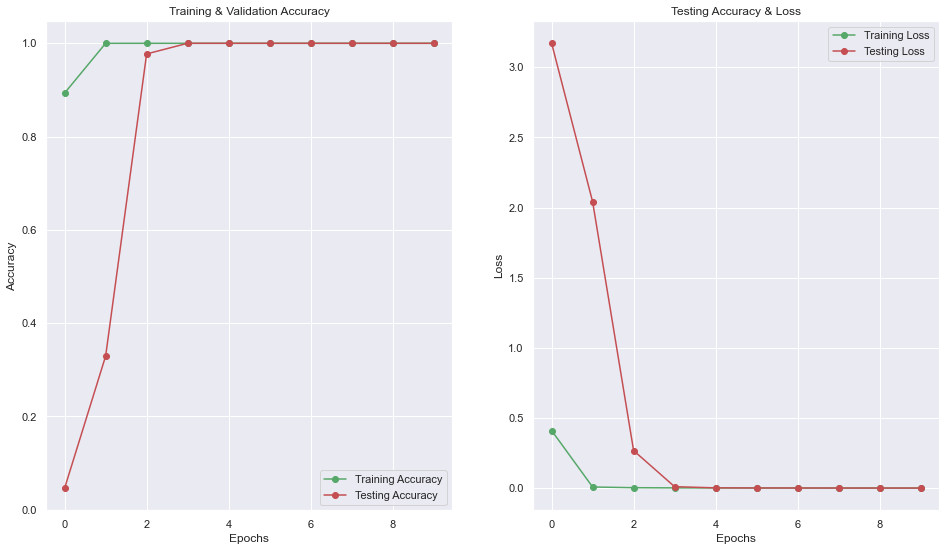

In [124]:
epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()
